# Static image processing

# **Mediapipe setup**

In [ ]:
!pip install numpy==1.23.5
!pip install mediapipe opencv-python --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.7 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.


In [ ]:
import mediapipe as mp
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image_path='/content/drive/MyDrive/scr_project/Test.jpg'

In [ ]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

In [ ]:
results = hands.process(image_rgb)

In [ ]:
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    print("Hand detected and landmarks drawn.")
else:
    print("No hand detected in the image.")

Hand detected and landmarks drawn.


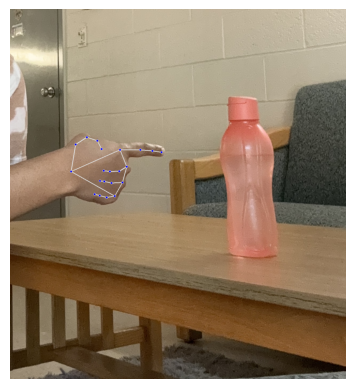

In [ ]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
hand_landmarks = results.multi_hand_landmarks[0]

wrist = hand_landmarks.landmark[0]  # wrist
index_fingertip = hand_landmarks.landmark[8]  # index finger tip

#Calculating pointing vector
dx = index_fingertip.x - wrist.x
dy = index_fingertip.y - wrist.y
dz = index_fingertip.z - wrist.z

print(f"Pointing vector: [{dx:.4f}, {dy:.4f}, {dz:.4f}]")

Pointing vector: [0.2691, -0.0518, 0.1233]


In [ ]:
fingertip_vector = np.array([index_fingertip.x, index_fingertip.y, index_fingertip.z])
print(fingertip_vector)

[0.45084149 0.38750279 0.12334499]


# **Yolo setup**

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8s.pt")

100%|██████████| 21.5M/21.5M [00:00<00:00, 145MB/s] 


In [ ]:
results = model(image_path)


image 1/1 /content/drive/MyDrive/scr_project/Test.jpg: 640x608 2 persons, 1 bottle, 1 chair, 1 dining table, 1 vase, 39.0ms
Speed: 15.5ms preprocess, 39.0ms inference, 358.2ms postprocess per image at shape (1, 3, 640, 608)


In [ ]:
detected_objects = []

for box in results[0].boxes:
    cls_id = int(box.cls[0])
    label = model.names[cls_id].lower()

    if label == "person":
        continue

    xyxy = box.xyxy[0].cpu().numpy()

    # Calculating center of bounding box
    x_center = (xyxy[0] + xyxy[2]) / 2
    y_center = (xyxy[1] + xyxy[3]) / 2

    detected_objects.append({
        "label": label,
        "center": [x_center, y_center]
    })

for obj in detected_objects:
    print(f"{obj['label']} at {obj['center']}")


vase at [893.4165649414062, 628.0206909179688]
dining table at [628.9667358398438, 1065.1519775390625]
bottle at [894.482666015625, 627.9352416992188]
chair at [702.9720458984375, 663.8975830078125]


In [ ]:
import random

def draw_pretty_boxes(image, results, model):
    class_colors = {}

    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        label = model.names[cls_id].lower()

        if label == "person":
            continue

        xyxy = box.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = xyxy

        if label not in class_colors:
            class_colors[label] = [random.randint(50, 255) for _ in range(3)]
        color = class_colors[label]

        cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness=4)

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 1.0
        font_thickness = 3
        label_text = f"{label}"
        (text_width, text_height), _ = cv2.getTextSize(label_text, font, font_scale, font_thickness)

        cv2.rectangle(image, (x1, y1 - text_height - 12), (x1 + text_width + 10, y1), color, -1)

        cv2.putText(image, label_text, (x1 + 5, y1 - 5), font, font_scale, (0, 0, 0), font_thickness)

    return image


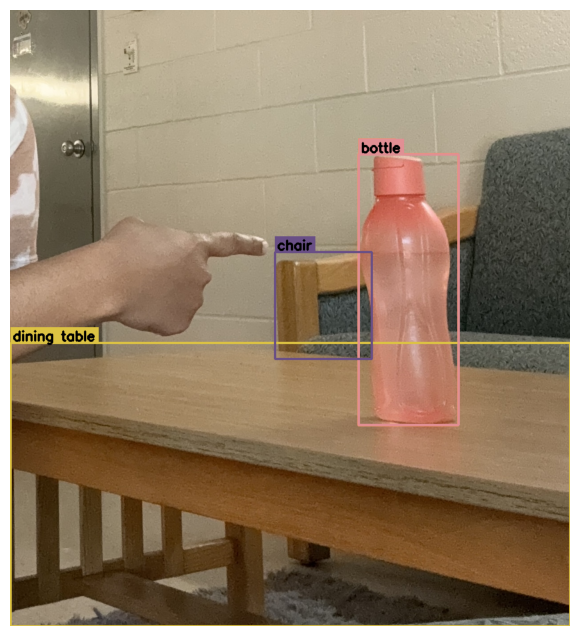

In [ ]:
img = cv2.imread(image_path)
img_with_boxes = draw_pretty_boxes(img.copy(), results, model)

import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
h, w, _ = image.shape

#Converting normalized coordinates to pixel space
x_wrist = int(wrist.x * w)
y_wrist = int(wrist.y * h)

x_tip = int(index_fingertip.x * w)
y_tip = int(index_fingertip.y * h)

In [ ]:
wrist_px = (x_wrist, y_wrist)
tip_px = (x_tip, y_tip)

In [ ]:
pointing_vec_2d = np.array([x_tip - x_wrist, y_tip - y_wrist])
pointing_vec_2d = pointing_vec_2d / np.linalg.norm(pointing_vec_2d)

In [ ]:
def get_most_likely_pointed_object(wrist_xy, tip_xy, detected_objects):
    pointing_vec = np.array([tip_xy[0] - wrist_xy[0], tip_xy[1] - wrist_xy[1]])
    pointing_vec = pointing_vec / np.linalg.norm(pointing_vec)

    object_scores = []

    for obj in detected_objects:
        obj_vec = np.array([obj["center"][0] - wrist_xy[0], obj["center"][1] - wrist_xy[1]])
        obj_vec = obj_vec / np.linalg.norm(obj_vec)

        similarity = np.dot(pointing_vec, obj_vec)
        object_scores.append((obj["label"], obj["center"], similarity))

    object_scores.sort(key=lambda x: x[2], reverse=True)

    return object_scores


In [ ]:
scores = get_most_likely_pointed_object(wrist_px, tip_px, detected_objects)

In [ ]:
scores

[('bottle', [894.482666015625, 627.9352416992188], 0.9710324587229889),
 ('vase', [893.4165649414062, 628.0206909179688], 0.9709897758941782),
 ('chair', [702.9720458984375, 663.8975830078125], 0.9463322935587922),
 ('dining table', [628.9667358398438, 1065.1519775390625], 0.4873503704322801)]

In [ ]:
print('person is pointing to: ',scores[0])

person is pointing to:  ('bottle', [894.482666015625, 627.9352416992188], 0.9710324587229889)


In [ ]:
#Extracting top object (the one most aligned with the pointing vector)
top_object_label, top_object_center, top_score = scores[0]
x_obj, y_obj = int(top_object_center[0]), int(top_object_center[1])

cv2.arrowedLine(
    img_with_boxes,
    wrist_px,
    (x_obj, y_obj),
    color=(0, 0, 255),
    thickness=4,
    tipLength=0.1
)

cv2.putText(
    img_with_boxes,
    f"Pointing to: {top_object_label}",
    (x_obj + 10, y_obj - 10),
    cv2.FONT_HERSHEY_SIMPLEX,
    1,
    (0, 0, 255),
    3
)


array([[[255, 255, 233],
        [220, 174,  89],
        [220, 174,  89],
        ...,
        [ 91, 110, 131],
        [ 89, 108, 129],
        [ 87, 106, 127]],

       [[255, 255, 232],
        [220, 174,  89],
        [220, 174,  89],
        ...,
        [ 86, 105, 126],
        [ 84, 103, 124],
        [ 82, 101, 122]],

       [[255, 255, 231],
        [220, 174,  89],
        [220, 174,  89],
        ...,
        [ 82, 101, 122],
        [ 82, 101, 122],
        [ 81, 100, 121]],

       ...,

       [[112, 133, 160],
        [112, 133, 160],
        [113, 134, 161],
        ...,
        [ 60,  87, 114],
        [ 58,  85, 112],
        [ 57,  84, 111]],

       [[111, 132, 159],
        [112, 133, 160],
        [112, 133, 160],
        ...,
        [ 63,  90, 117],
        [ 62,  89, 116],
        [ 60,  87, 114]],

       [[111, 132, 159],
        [112, 133, 160],
        [112, 133, 160],
        ...,
        [ 65,  92, 119],
        [ 64,  91, 118],
        [ 63,  90, 117]]

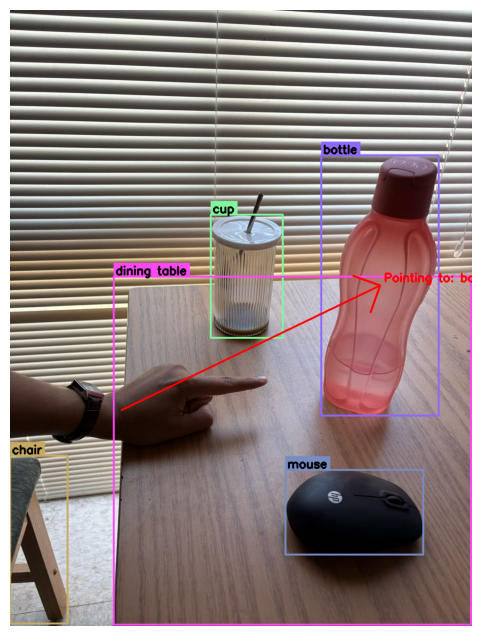

In [ ]:
img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


In [ ]:
def overlay_mediapipe_and_yolo(image, results, model, hand_landmarks, image_shape):

    import cv2
    import random
    h, w, _ = image_shape
    class_colors = {}

    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        label = model.names[cls_id].lower()
        if label == "person":
            continue

        xyxy = box.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = xyxy

        if label not in class_colors:
            class_colors[label] = [random.randint(50, 255) for _ in range(3)]
        color = class_colors[label]

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)
        cv2.putText(image, label, (x1 + 5, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    for i, landmark in enumerate(hand_landmarks.landmark):
        cx = int(landmark.x * w)
        cy = int(landmark.y * h)
        cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)
        if i == 0:
            cv2.putText(image, "Wrist", (cx + 5, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        elif i == 8:
            cv2.putText(image, "Index Tip", (cx + 5, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

    return image


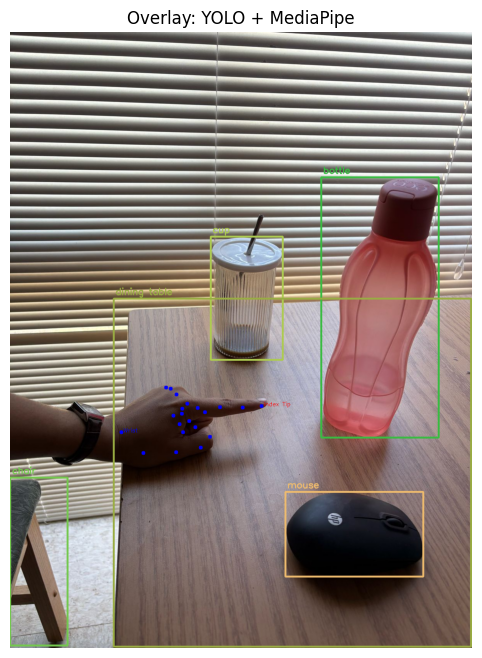

In [ ]:
img = cv2.imread(image_path)
#hand_landmarks =results.multi_hand_landmarks[0]
img_overlayed = overlay_mediapipe_and_yolo(img.copy(), results, model, hand_landmarks, img.shape)

import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(img_overlayed, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Overlay: YOLO + MediaPipe")
plt.show()


In [ ]:
def draw_dashed_line(img, pt1, pt2, color=(0, 0, 255), thickness=3, gap=15):
    dist = np.linalg.norm(np.array(pt1) - np.array(pt2))
    if dist == 0:
        return
    pts = np.linspace(0, 1, int(dist / gap * 2))
    for i in range(0, len(pts) - 1, 2):
        start = (int(pt1[0] + (pt2[0] - pt1[0]) * pts[i]),
                 int(pt1[1] + (pt2[1] - pt1[1]) * pts[i]))
        end = (int(pt1[0] + (pt2[0] - pt1[0]) * pts[i + 1]),
               int(pt1[1] + (pt2[1] - pt1[1]) * pts[i + 1]))
        cv2.line(img, start, end, color, thickness)

In [ ]:
def overlay_yolo_mediapipe_and_pointing_line(image, results, model, wrist_px, tip_px, scores):

    class_colors = {}

    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        label = model.names[cls_id].lower()

        if label == "person":
            continue

        xyxy = box.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = xyxy

        if label not in class_colors:
            class_colors[label] = [random.randint(50, 255) for _ in range(3)]
        color = class_colors[label]

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 4)
        label_text = f"{label}"
        (text_width, text_height), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 3)
        cv2.rectangle(image, (x1, y1 - text_height - 12), (x1 + text_width + 10, y1), color, -1)
        cv2.putText(image, label_text, (x1 + 5, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 0), 2)

    for i, landmark in enumerate(hand_landmarks.landmark):
        cx = int(landmark.x * w)
        cy = int(landmark.y * h)
        cv2.circle(image, (cx, cy), 5, (255, 0, 0), -1)
        if i == 0:
            cv2.putText(image, "Wrist", (cx + 5, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        elif i == 8:
            cv2.putText(image, "Index Tip", (cx + 5, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    if scores:
        top_label, top_center, top_score = scores[0]
        x_obj, y_obj = int(top_center[0]), int(top_center[1])
        draw_dashed_line(image, wrist_px, (x_obj, y_obj), color=(0, 0, 255), thickness=3, gap=15)
        text = f"Pointing to: {top_label}"
        (text_width, text_height), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, 3)
        text_x = x_obj + 10
        text_y = y_obj - 10

        if text_x + text_width > image.shape[1]:
            text_x = x_obj - text_width - 10

        cv2.putText(
        image,
        text,
        (text_x, text_y),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 255),
        2
    )

    return image


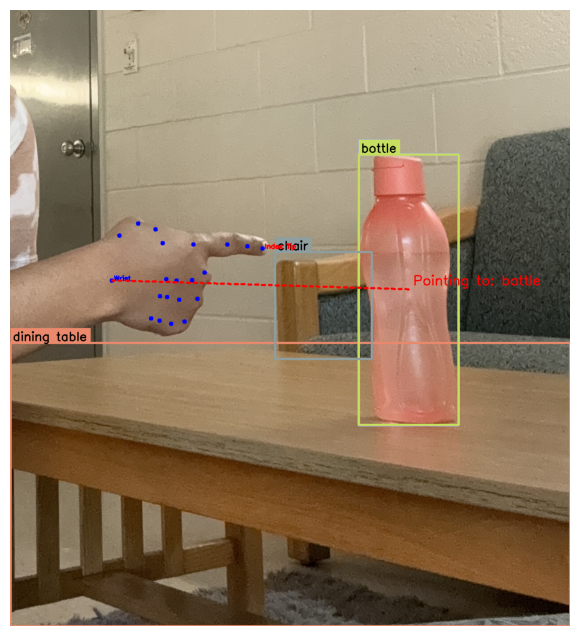

In [ ]:
img = cv2.imread(image_path)

img_overlay = overlay_yolo_mediapipe_and_pointing_line(img.copy(), results, model, wrist_px, tip_px, scores)

img_rgb = cv2.cvtColor(img_overlay, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.tight_layout(pad=0)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


# Video Processing for Object Pointing Detection
This second part of the notebook processes a video to detect objects using YOLO and hand landmarks using MediaPipe, computing the probability that the person is pointing to each object per frame.


In [ ]:
#Installing vision packages
!pip install --upgrade --no-deps mediapipe==0.10.21 \
                             opencv-python==4.11.0.86 \
                             ultralytics==8.3.131 \
                             tqdm \
                             langchain_ollama

import os, signal
os.kill(os.getpid(), signal.SIGKILL)

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import mediapipe as mp

mp_hands    = mp.solutions.hands
mp_drawing  = mp.solutions.drawing_utils
hands       = mp_hands.Hands(
                 static_image_mode=False,
                 max_num_hands=1,
                 min_detection_confidence=0.5,
                 min_tracking_confidence=0.5
             )

model = YOLO('yolov8s.pt')

In [ ]:
input_path       = '/content/VideoTest2.mp4'
wireframe_output = 'wireframe_output.mp4'

cap    = cv2.VideoCapture(input_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
w      = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h      = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
writer = cv2.VideoWriter(wireframe_output, fourcc, fps, (w, h))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    res = hands.process(rgb)
    if res.multi_hand_landmarks:
        for lm in res.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, lm, mp_hands.HAND_CONNECTIONS)
    writer.write(frame)

cap.release()
writer.release()


In [ ]:
classification_output = 'classification_output.mp4'

cap    = cv2.VideoCapture(input_path)
writer = cv2.VideoWriter(classification_output, fourcc, fps, (w, h))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    rgb      = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    hand_res = hands.process(rgb)
    if hand_res.multi_hand_landmarks:
        yolo_res = model(frame)[0]
        for box, cls, conf in zip(yolo_res.boxes.xyxy,
                                  yolo_res.boxes.cls,
                                  yolo_res.boxes.conf):
            name = model.names[int(cls)]
            if name == 'person':
                continue
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(frame,
                        f"{name} {conf:.2f}",
                        (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.9,
                        (0,255,0),
                        2)
    writer.write(frame)

cap.release()
writer.release()


In [ ]:
pointing_output = 'pointing_overlay.mp4'
results         = []

cap    = cv2.VideoCapture(input_path)
writer = cv2.VideoWriter(pointing_output, fourcc, fps, (w, h))
frame_idx = 0

def compute_pointing_scores(wrist_xy, tip_xy, boxes, class_ids, confs, names):
    # building pointing vector
    p_vec = np.array([tip_xy[0] - wrist_xy[0], tip_xy[1] - wrist_xy[1]])
    p_norm = np.linalg.norm(p_vec)
    scores = []
    for (x1, y1, x2, y2), cls, conf in zip(boxes, class_ids, confs):
        name = names[int(cls)]
        if name == 'person':
            continue

        cx = (x1 + x2) / 2
        cy = (y1 + y2) / 2
        v = np.array([cx - wrist_xy[0], cy - wrist_xy[1]])
        v_norm = np.linalg.norm(v)
        cos_sim = (np.dot(p_vec, v) / (p_norm * v_norm)) if (p_norm * v_norm) else 0
        scores.append((name, cx, cy, cos_sim))
    return scores

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    hand_res = hands.process(rgb)
    if not hand_res.multi_hand_landmarks:
        frame_idx += 1
        continue

    lm = hand_res.multi_hand_landmarks[0]
    wrist_xy = (w * lm.landmark[mp_hands.HandLandmark.WRIST].x,
                h * lm.landmark[mp_hands.HandLandmark.WRIST].y)
    tip_xy   = (w * lm.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,
                h * lm.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)

    yolo_res  = model(frame)[0]
    boxes     = yolo_res.boxes.xyxy.cpu().numpy()
    class_ids = yolo_res.boxes.cls.cpu().numpy()
    confs     = yolo_res.boxes.conf.cpu().numpy()

    scores = compute_pointing_scores(wrist_xy, tip_xy, boxes, class_ids, confs, model.names)
    if scores:
        for name, cx, cy, prob in scores:
            ix, iy = int(cx), int(cy)
            cv2.circle(frame, (ix, iy), 5, (255, 0, 0), -1)
            cv2.putText(
                frame,
                f"{name} {prob:.2f}",
                (ix, iy - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.7,
                (255, 0, 0),
                2
            )

        results.append({
            'frame':     frame_idx,
            'time_sec':  frame_idx / fps,
            'scores': [
                {'object': n, 'x': float(cx), 'y': float(cy), 'pointing_prob': float(pr)}
                for n, cx, cy, pr in scores
            ]
        })

    writer.write(frame)
    frame_idx += 1

cap.release()
writer.release()


In [ ]:
import pandas as pd

df = pd.DataFrame(results)
df.to_json('pointing_report.json', orient='records', indent=2)
df.head()


,frame,time_sec,scores
0,1,0.033333,"[{'object': 'mouse', 'x': 762.7796020507812, '..."
1,2,0.066667,"[{'object': 'mouse', 'x': 762.7490844726562, '..."
2,3,0.100000,"[{'object': 'mouse', 'x': 762.7703857421875, '..."
3,4,0.133333,"[{'object': 'mouse', 'x': 762.797119140625, 'y..."
4,5,0.166667,"[{'object': 'mouse', 'x': 762.4041137695312, '..."


#Deepseek R1 LLM Integration


In [ ]:
!pip install colab-xterm
%load_ext colabxterm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

In [ ]:
!ollama list

NAME              ID              SIZE      MODIFIED       
deepseek-r1:7b    0a8c26691023    4.7 GB    42 minutes ago    


In [ ]:
%pip install -U langchain-ollama

Trial 1


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama import OllamaLLM

template = """You are the controller for a robotic claw.
Given a list of detected objects with their screen coordinates and pointing probabilities,
for each frame choose the single object that the human is pointing at—and that the claw can actually pick up.
Exclude objects that are too large, fixed, or otherwise impossible to grasp by a simple robot (e.g., couch, bed, car).

IMPORTANT: Do NOT include any explanations, reasoning, or commentary.
Output ONLY the JSON array in this exact format:

[
  {{"frame": 1,   "time_sec": 0.03, "chosen_object": "..."}},
  {{"frame": 114, "time_sec": 3.80, "chosen_object": "..."}},
  {{"frame": 116, "time_sec": 3.87, "chosen_object": "..."}}
]

Entries:
{question}
"""

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="deepseek-r1:7b")

chain= prompt | model

prompt = """
[
  {
    "frame": 10,
    "time_sec": 0.33,
    "scores": [
      {"object": "bed",   "x": 400.12, "y": 150.75, "pointing_prob": 0.97},
      {"object": "knife",  "x": 320.50, "y": 200.10, "pointing_prob": 0.85},
      {"object": "mug",    "x": 250.75, "y": 230.40, "pointing_prob": 0.65},
      {"object": "sofa",   "x": 500.20, "y": 300.33, "pointing_prob": 0.92}
    ]
  },
  {
    "frame": 75,
    "time_sec": 2.50,
    "scores": [
      {"object": "bed",   "x": 410.00, "y": 155.60, "pointing_prob": 0.88},
      {"object": "remote", "x": 220.45, "y": 180.90, "pointing_prob": 0.80},
      {"object": "book",   "x": 275.30, "y": 210.25, "pointing_prob": 0.72}
    ]
  },
  {
    "frame": 120,
    "time_sec": 4.00,
    "scores": [
      {"object": "sofa",   "x": 505.10, "y": 302.80, "pointing_prob": 0.95},
      {"object": "cup",    "x": 260.20, "y": 235.50, "pointing_prob": 0.90},
      {"object": "spoon",  "x": 230.00, "y": 240.10, "pointing_prob": 0.60}
    ]
  }
]
"""


chain.invoke({"question": prompt})


'<think>\nOkay, so I\'m trying to figure out which object the claw should pick up for each frame based on the given data. The user provided a list of objects with their screen coordinates and pointing probabilities. My task is to choose the single object that the human is pointing at in each frame, but exclude things like fixed furniture or too large items that the claw can\'t handle.\n\nFirst, I\'ll look at each frame one by one.\n\nIn frame 10, there are four objects: bed, knife, mug, and sofa. The pointing probabilities for each are pretty high except for the mug which is lower. Bed has a very high probability of 0.97, which seems really strong. Sofa also has a high probability of 0.92. However, beds and sofas are usually big items. I remember the user mentioned to exclude fixed objects or too large ones that the claw can\'t grasp. So even though bed and sofa have high probabilities, maybe they\'re too large for the robot claw. That leaves knife and mug. Knife has a pointing probabi